<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Vicente Correa
- Nombre de alumno 2: Diego Kauer


### **Link de repositorio de GitHub:** `https://github.com/diegokauer/MDS7202`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


In [10]:
df.shape

(70692, 18)

In [11]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Balance de las clases
df['Diabetes'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?.

- Dado que la data ya viene preprocesada, y de la manera en que se aplica el modelo de XGBoosting, no es necesario aplicar transformaciones a las variables, ni de OneHotEncoding ni de escalamiento.
- En base a los resultados de las métricas, se ve que es un buen modelo, pero al tratarse de predcción de una enfermedad que requiere atención y cuidado permanente, el modelo debe ser aún mas certero, por lo que debe subir los niveles de accuracy, precision y recall.
- El accuracy nos dice las predicciones correctas de diabetes sobre el total, mientras que precision nos dice cuantas predicciones correcatas hubo respecto de todas las predicciones de diabetes, y recall nos dice la cantidad de predicciones correctas sobre el total de casos positivos.
- Estas métricas no aseguran ni dicen nada respecto de una buena o mala elección de features, sólo indica el resultado final de las predicciones hechas por el modelo.


In [13]:
!pip install xgboost

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6485
           1       0.79      0.73      0.76      7654

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



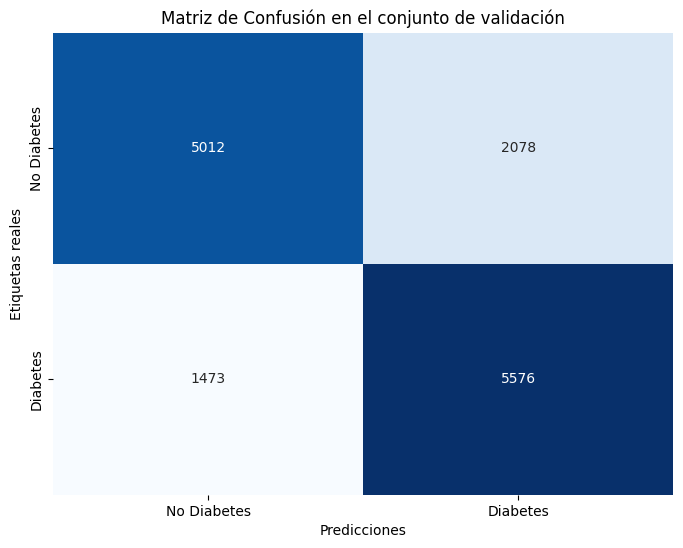

In [15]:
# Separar X e y del dataframe
X = df.loc[:, ~df.columns.isin(['Diabetes'])]
y = df.loc[:, 'Diabetes']

# Separar la data en 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Generar el pipeline
pipe = Pipeline(steps=[
    ('classifier', XGBClassifier())
])

# Entrenar
pipe.fit(X_train, y_train)

# Predecir
y_pred = pipe.predict(X_test)

# Reporte de Accuracy, Precision, Recall, f1-Score
print(classification_report(y_pred, y_test))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión en el conjunto de validación')
plt.show()

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

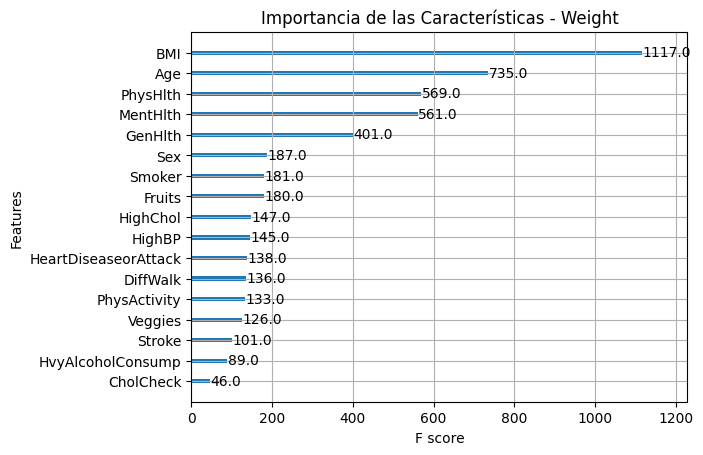

In [16]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Acceder al modelo entrenado
model = pipe.named_steps['classifier']

# Calcula la importancia de las características usando 'weight'
xgb.plot_importance(model, importance_type='weight')
plt.title('Importancia de las Características - Weight')
plt.show()

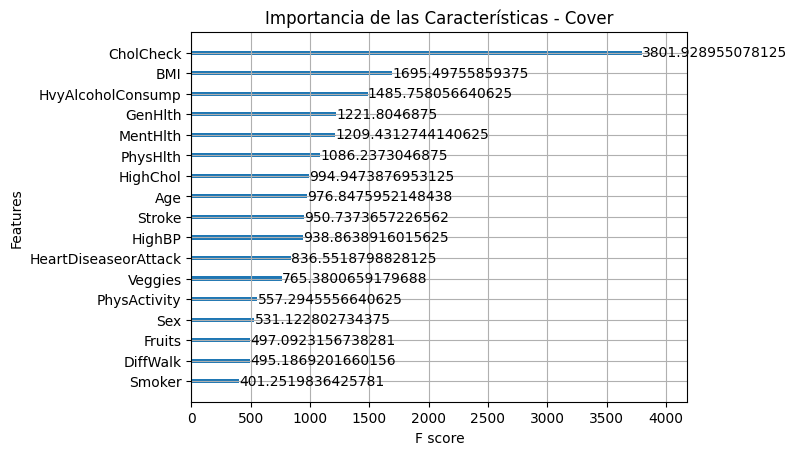

In [17]:
# Calcula la importancia de las características usando 'cover'
xgb.plot_importance(model, importance_type='cover')
plt.title('Importancia de las Características - Cover')
plt.show()

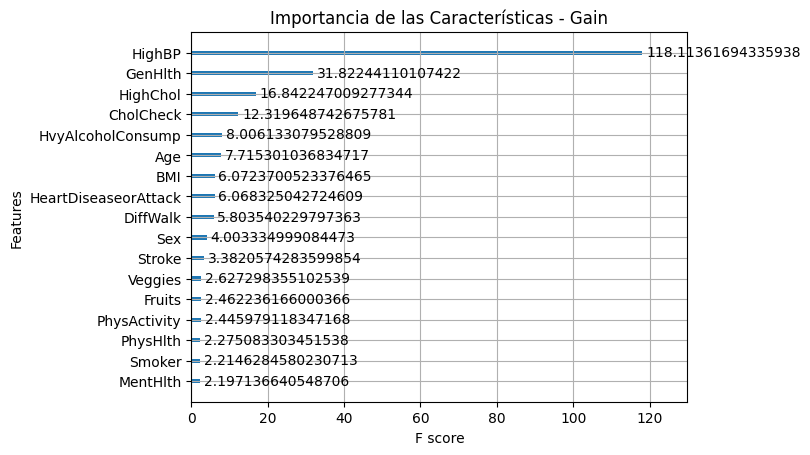

In [18]:
# Calcula la importancia de las características usando 'gain'
xgb.plot_importance(model, importance_type='gain')
plt.title('Importancia de las Características - Gain')
plt.show()

Como se puede ver, los tres métodos arrojan resultados diferentes, por lo cuál no son compatibles. Para el caso de "weight", los atributos más importantes son el BMI y la edad. En el caso de "Cover", los más importantes son CholCheck y BMI. En el caso de "Gain", los más importantes son HighBP y GenHlth. Esta diferencia en los resultados se debe principalmente a las diferentes perspectivas que tiene cada método sobre la importancia de las características. Por dar un ejemplo, BMI tiene un alto peso porque se utiliza con frecuencia dentro de los árboles y en ese sentido es la más importante, pero no es la más importante bajo la perspectiva de gain dado que su contribución a la mejora de la precisión es baja.

Las importancias obtenidas no son suficientes para dar una interpretabilidad final al modelo, ya que hay que complementarla con saber la estructura de los árboles, entender la interacción entre características, por mencionar algunas. La mezcla de estos métodos puede dar una interpretación mas robusta y significativa del modelo. Esta insuficiencia para dar la interpretabilidad total al modelo es su debilidad.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

Respuesta:

- El metodo de permutación mide la importancia al permutar de forma aleatoria los valores de la variable y mide el efecto que tiene en el error. Entre más importante es la variable mayor será el efecto de la permutación en el error.

- Las 5 más importantes son "GenHlth", la salud general; "CholCheck" la cantidad de colesterol; "BMI", el indice de masa corporal; "HighBp" si tiene alta presión; y "Sex", el sexo del paciente. Si tiene sentido dado que muchas de estas condiciones estan asociadas a la diabetes.

- Se sigue teniendo una alta importancia en "GenHlth", "BMI", "ColCheck" y "HighBP", sin embargo se nota la ausencia de "HvyAlcoholConnsump" que si se presentaba notoriamente en la parte anterior.

- Dentro de las ventajas:
    - Fácil interpretación. Es facil interpretar los resultados de este modelo para obtener la importancia
    - No necesita re-entrenar el modelo. No es necesario ya que simplemente se predice utilizando el modelo permutado.
    - Comparable con diferentes modelos. Debido a la forma en que se obtiene la importancia es comparable entre modelos.
- Dentro de las desventajas:
    - Enlazado al error del modelo. Si el modelo tiene alto error los resultados de este metodo puede ser solo rudio.
    - Necesitas acceso a la gold label. Solo funciona en modelos sipervisados en donde se tiene el ground truth y no un proxy de este.
    - Si las features están correlacionadas puede generar sesgos por entradas poco realistas.

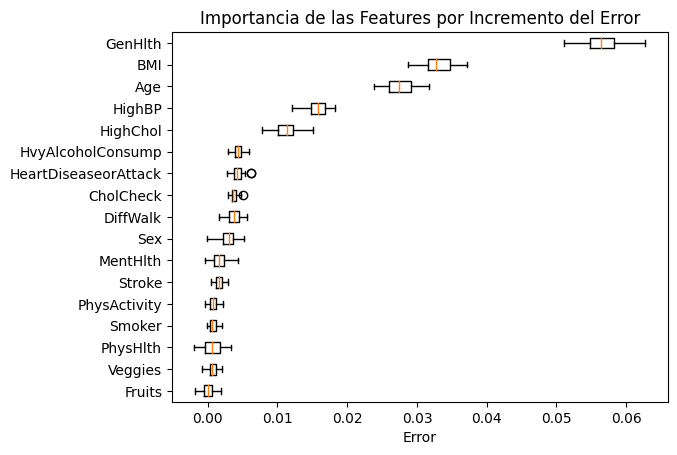

In [19]:
# Inserte su código

from sklearn.inspection import permutation_importance

result = permutation_importance(pipe, X_test, y_test, n_repeats=30, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(model.get_booster().feature_names)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

Los valores representan el efecto marginal de la variable en el resultado. Esto para cada observación. Un valor positivo indica que la presencia de una característica contribuye positivamente a la predicción, aumentando la predicción cuando esa característica tiene un valor alto. Un valor negativo sugiere que la presencia de la característica contribuye negativamente, disminuyendo la predicción cuando la característica tiene un valor alto.

In [20]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.8 MB/s eta 0:00:00


In [21]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [22]:
# Inserte código para calcular shapley values aquí

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

shap_values

[00:01:24] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


.values =
array([[-1.268375  , -0.00460456, -0.3848604 , ..., -0.08242669,
        -0.01611218,  0.49607968],
       [ 0.2021631 ,  0.05632673,  0.14292245, ..., -0.05447157,
         0.07768462,  0.4162888 ],
       [ 0.91174173,  0.31258932, -0.297469  , ..., -0.06976558,
        -0.02217249, -0.64350384],
       ...,
       [-0.2627788 , -0.08597348,  0.28478292, ...,  0.29957864,
        -0.01806796,  0.47976932],
       [ 0.3048206 , -0.1685042 ,  0.33939835, ...,  0.26907772,
        -0.02126826,  0.58223975],
       [ 0.17443807,  0.03591182,  0.23616262, ..., -0.0959989 ,
        -0.03462881,  0.53356117]], dtype=float32)

.base_values =
array([-0.00636338, -0.00636338, -0.00636338, ..., -0.00636338,
       -0.00636338, -0.00636338], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

Respuesta:

- En general "Age", "PhysHlth", "HighBP" si son altas hacen que sea más probable tener diabetes. "Sex" y "MentHlth" si son bajas tienden a hacer que sea menos probable.
- Hay algunos patrones pero nada generalizable.
- No hay que considerar más muestras y ver los efectos en promedio de las variables.

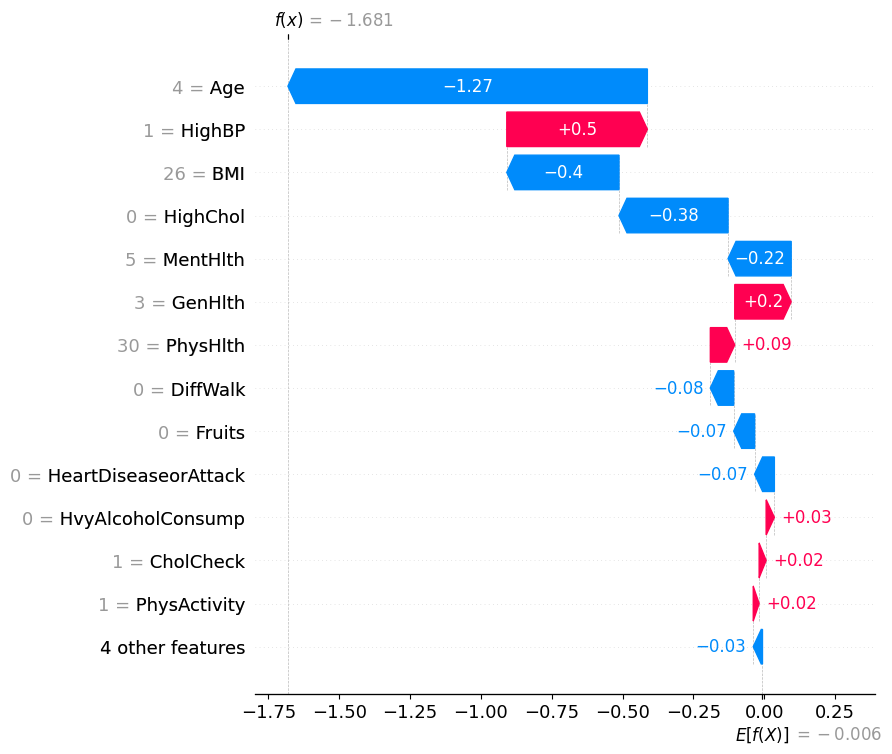

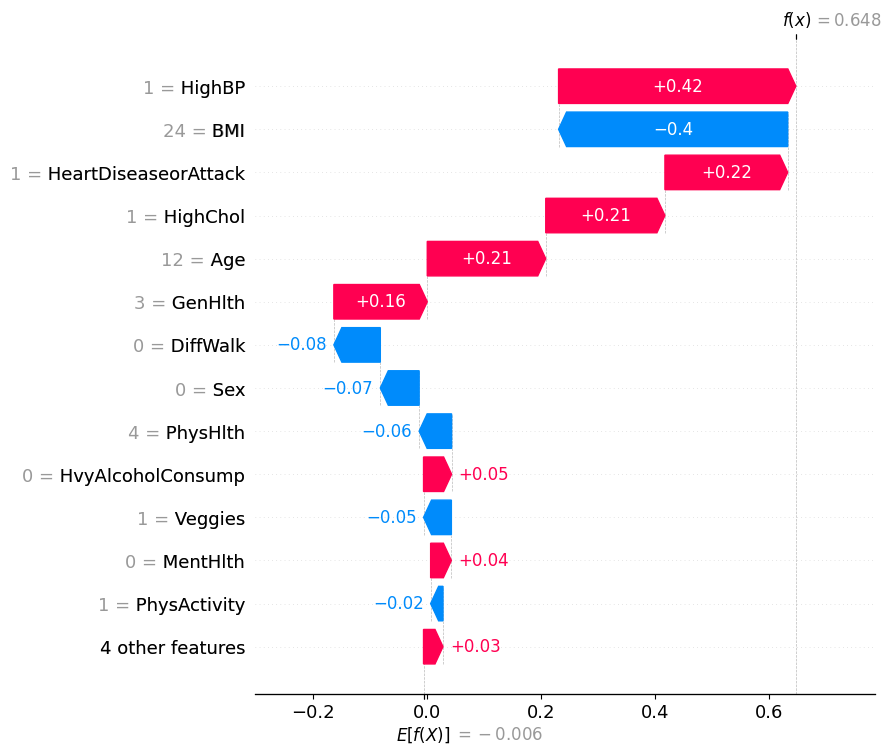

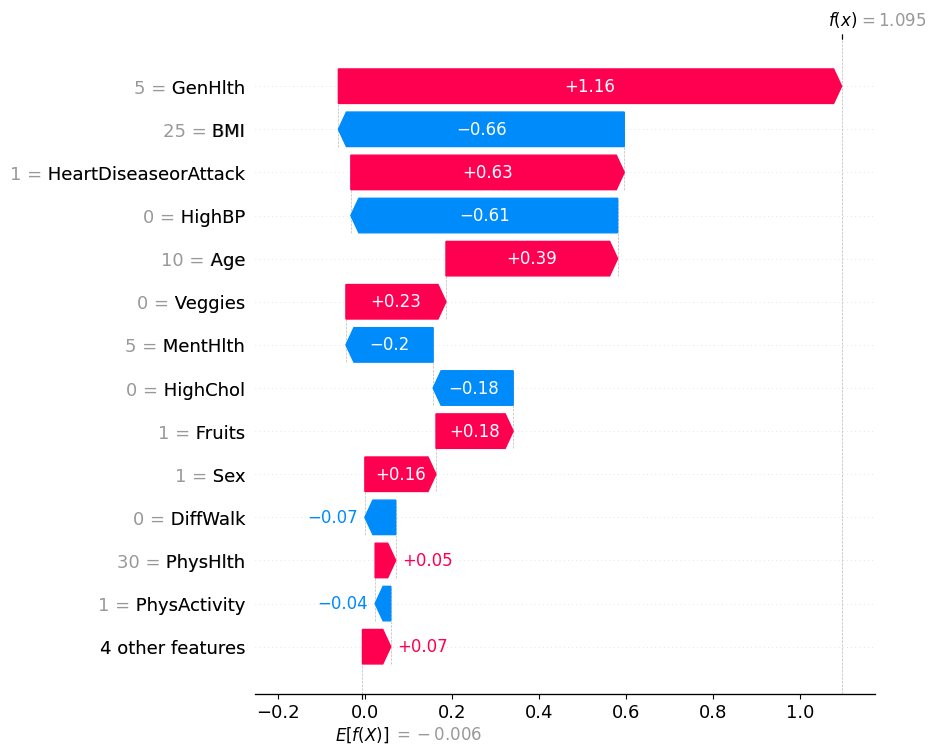

In [23]:
# Inserte código para generar gráficos de aporte local aquí

shap.plots.waterfall(shap_values[0],
                     max_display=14)
shap.plots.waterfall(shap_values[10],
                     max_display=14)
shap.plots.waterfall(shap_values[151],
                     max_display=14)

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

Respuesta:

Se puede ver que "HighBP" es un buen predictor de diabetes (correlacion vs causalidad), por otra parte "Age" no es un buen predictor debido a su alto overlapping.

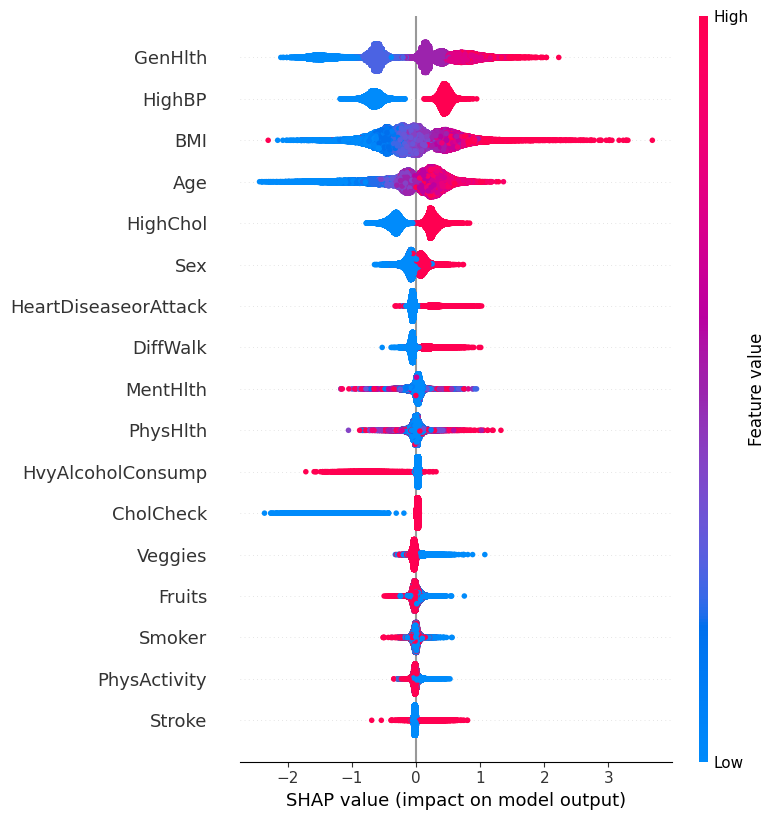

In [24]:
# Inserte código para generar gráficos de aporte global aquí

shap.summary_plot(shap_values, X)

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

Respuesta:

Se puede ver que estas variables explican bien la probabilidad de tener diabetes. Espcialemente "Sex",  "Smoker" y "HighBP".

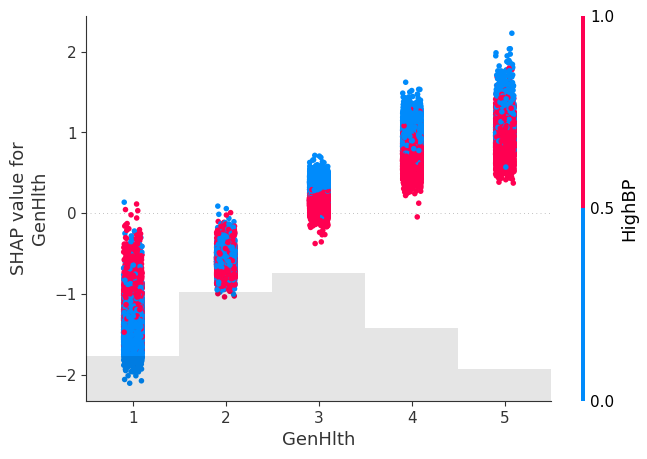

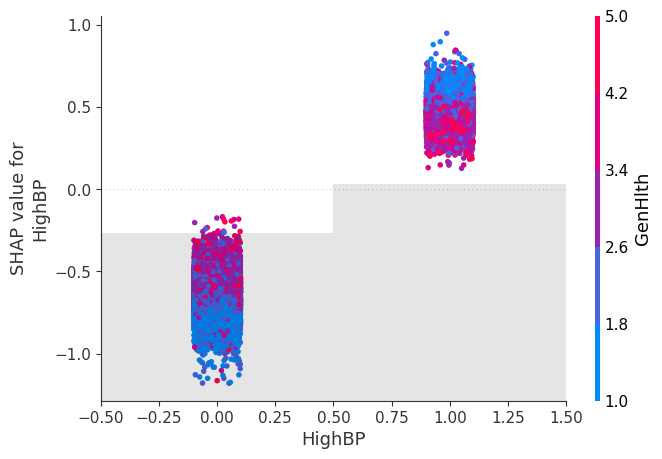

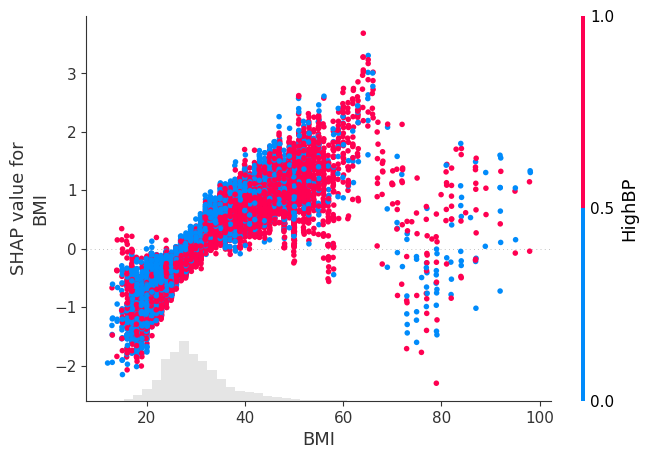

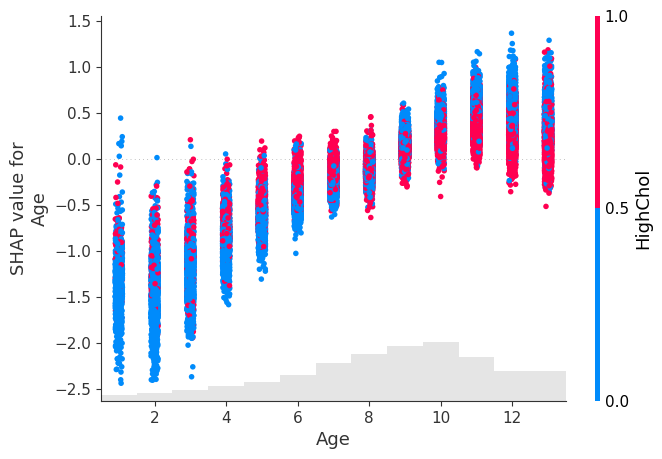

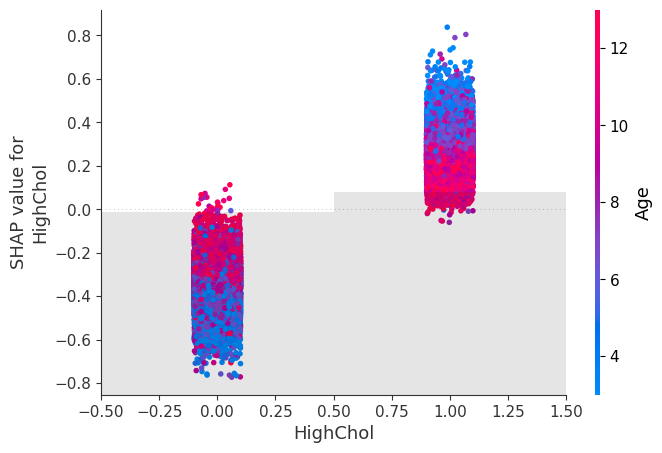

In [25]:
# Inserte código para generar gráficos de feature vs shap value aquí

# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

for name in feature_importance_names[:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name],
                   color=shap_values)

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

Respuesta:

Se puede ver que estas variables son muy buenas explicando la presencia de Diabetes. Es generalizable para todo el modelo ya que representa los datos de una muestra grande del dataset.

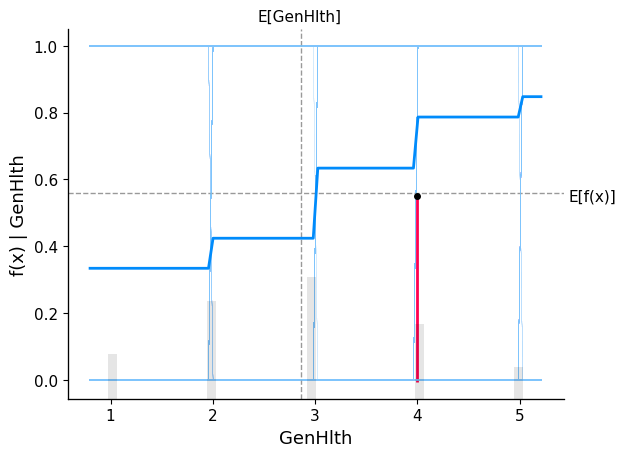

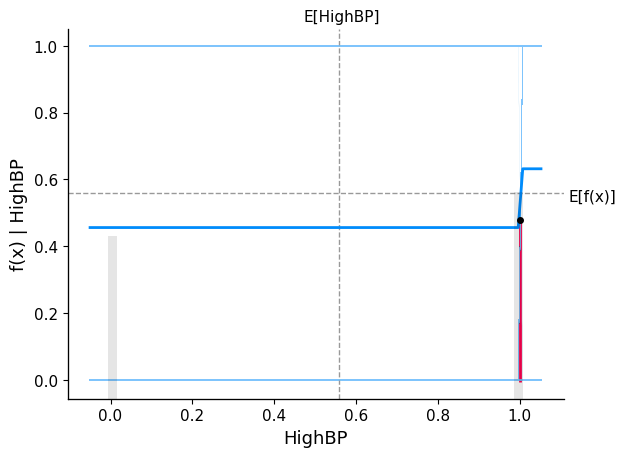

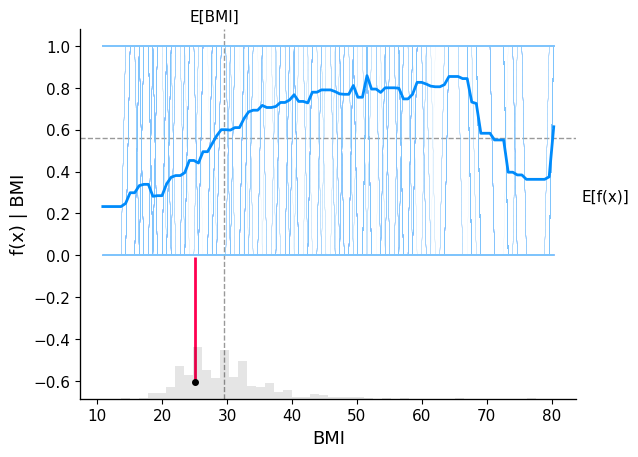

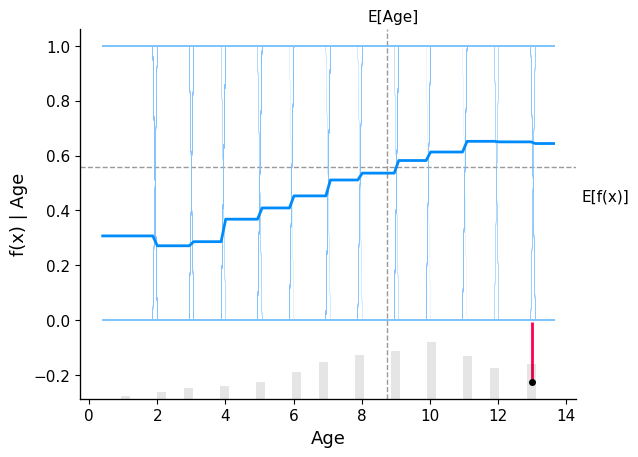

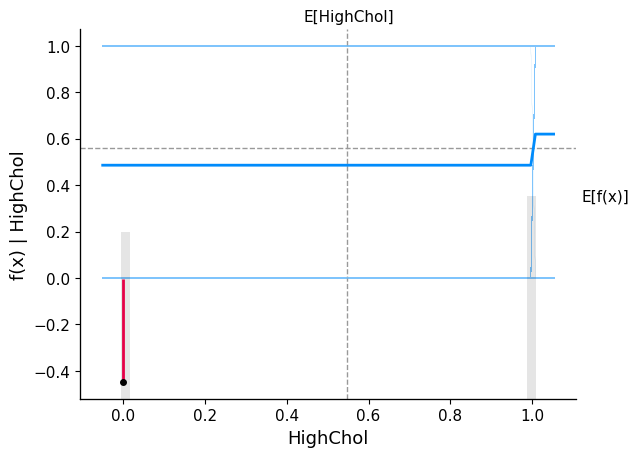

In [26]:
# Inserte código para generar gráficos PDP aquí

X1000 = shap.utils.sample(X, 1000)

for i in feature_importance_names[:5]:
    sample_ind = 100
    shap.partial_dependence_plot(
        i, pipe.predict, X1000, model_expected_value=True,
        feature_expected_value=True, ice=True,
        shap_values=shap_values[sample_ind:sample_ind+1,:]
    )

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [27]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.1 MB/s eta 0:00:00


In [28]:
from alibi.explainers import AnchorTabular

In [29]:
model.feature_names_in_

array(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'], dtype='<U20')

In [30]:
# Inserte su código para generar sistema de reglas aquí

predict_fn = lambda x: model.predict(x)
explainer = AnchorTabular(predict_fn, model.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())
class_names = ['No Diabetes', 'Diabetes']

idx = 1000
# explicar predicción idx 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Index: ', idx)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('\n')

idx = 3001
# explicar predicción idx 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Index: ', idx)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('\n')

idx = 5751
# explicar predicción idx 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Index: ', idx)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('\n')

Index:  1000
Prediction:  Diabetes
Anchor: Age > 11.00 AND HeartDiseaseorAttack > 0.00 AND BMI > 25.00
Precision: 0.98
Coverage: 0.03


Index:  3001
Prediction:  Diabetes
Anchor: GenHlth > 2.00 AND BMI > 33.00 AND HighBP > 0.00
Precision: 0.97
Coverage: 0.14


Index:  5751
Prediction:  No Diabetes
Anchor: BMI <= 25.00 AND GenHlth <= 2.00 AND HighBP <= 0.00
Precision: 1.00
Coverage: 0.11




Se han obtenido 3 sets de reglas, una para cada muestra. En el caso de la observación 1000, tiene una precision casi del 98% e impacta a 2.120 personas de la población (3%). En el caso de la observación 3001, tiene una precision de 97% y su alcance llega a las 9.896 personas (14%), lo cual es mejor que el caso anterior. La última muestra tiene una precision de 100% y sólo alcanza a 7.776 personas de la población (11%).

Si bien hacen sentido las reglas para cada predicción en cada caso, con las variables asociadas, el impacto que tienen sobre el total de la población alcanza un máximo de 28%, lo cuál sigue siendo bastante menor como para poder describir a la población en su totalidad. Las predicciones están bien, pero la cobertura sigue siendo baja.

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Los métodos que mejores resultados arrojaron en cuanto a conclusiones fueron: la importancia de variables mediante permutación, la importancia global y local de variables mediante Shap values. Esto porque permiten obtener conclusiones de manera agnóstica, no importando el modelo empleado.

> Para el caso específico del doctor Simi, es necesario utilizar ambos métodos para robustecer la interpretabilidad, pero si hubiera que inclinarse por uno entonces sería el agnóstico global, ya que da una primera vista general y ayuda a comprender las características más importantes del problema de la predicción de diabetes de los individuos.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>